<a href="https://colab.research.google.com/github/zzvcgmv/GAD7-survey/blob/main/P8170Capstone.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -U -q PyDrive

from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

#FHS_link = 'https://drive.google.com/file/d/1LTC4DR34YKCTMeW0H72hd8qo-dubcO6C/view?usp=share_link'
idFHS = "1LTC4DR34YKCTMeW0H72hd8qo-dubcO6C"
file = drive.CreateFile({'id':idFHS})
file.GetContentFile('framingham.csv')

**1. Load the Dataset and Import Packages**

In [9]:
import numpy as np
import pandas as pd
import seaborn as sns
import missingno as msno
from matplotlib import pyplot as plt
from scipy.stats import ttest_ind, mannwhitneyu
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.express as px
sns.set()
sns.set_style("whitegrid")

In [3]:
df = pd.read_csv('framingham.csv')
df.head()

,gender,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [4]:
df.shape

(4240, 16)

In [5]:
df.size

67840

In [6]:
# Convert columns to the correct data type
df['gender'] = df['gender'].astype('category')
df['education'] = df['education'].astype('category')
df['currentSmoker'] = df['currentSmoker'].astype('category')
df['BPMeds'] = df['BPMeds'].astype('category')
df['prevalentStroke'] = df['prevalentStroke'].astype('category')
df['prevalentHyp'] = df['prevalentHyp'].astype('category')
df['diabetes'] = df['diabetes'].astype('category')
df['TenYearCHD'] = df['TenYearCHD'].astype('category')

In [7]:
# Summary Statistics
## Continuous Variables
df.describe()
## Categorical Variable Distribution
categorical_columns = ["gender", "education", "currentSmoker", "BPMeds", "prevalentStroke", "prevalentHyp", "diabetes"]
categorical_summary = []
for col in categorical_columns:
    counts = df[col].value_counts(dropna=False)
    percentages = df[col].value_counts(normalize=True, dropna=False) * 100

    summary_df = pd.DataFrame({
        "Category": counts.index.fillna("Missing"),
        "Count": counts.values,
        "Percentage": percentages.values
    })

    summary_df["Cumulative Percentage"] = summary_df["Percentage"].cumsum()

    summary_df["Variable"] = col
    categorical_summary.append(summary_df)

categorical_summary_df = pd.concat(categorical_summary)
print(categorical_summary_df)

  Category  Count  Percentage  Cumulative Percentage         Variable
0        0   2420   57.075472              57.075472           gender
1        1   1820   42.924528             100.000000           gender
0      1.0   1720   40.566038              40.566038        education
1      2.0   1253   29.551887              70.117925        education
2      3.0    689   16.250000              86.367925        education
3      4.0    473   11.155660              97.523585        education
4  Missing    105    2.476415             100.000000        education
0        0   2145   50.589623              50.589623    currentSmoker
1        1   2095   49.410377             100.000000    currentSmoker
0      0.0   4063   95.825472              95.825472           BPMeds
1      1.0    124    2.924528              98.750000           BPMeds
2  Missing     53    1.250000             100.000000           BPMeds
0        0   4215   99.410377              99.410377  prevalentStroke
1        1     25   

<Figure size 300x200 with 0 Axes>

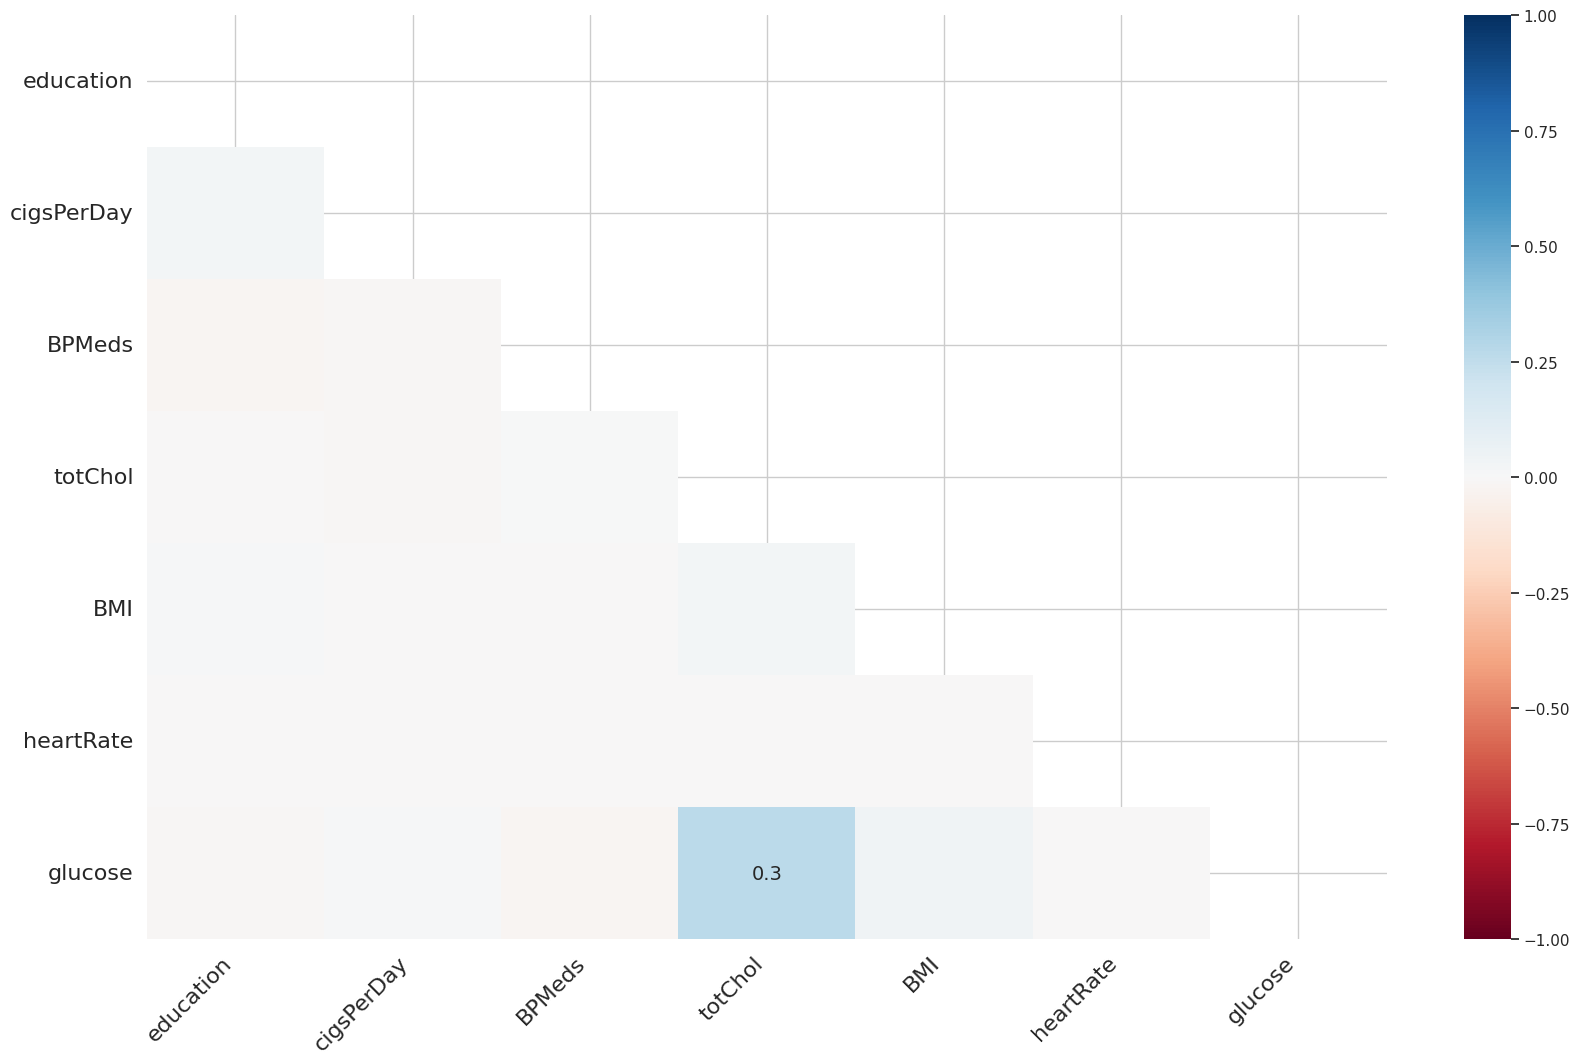

In [10]:
# Heatmap of missing values correlation
plt.figure(figsize=(3,2))
msno.heatmap(df)
plt.show()

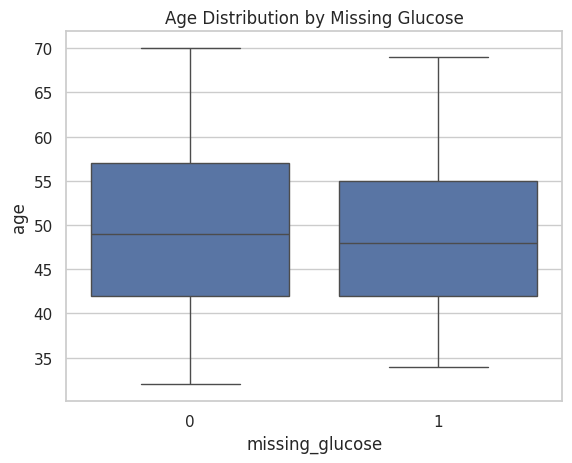

T-test Statistic: -1.4369968077703745
T-test p-value: 0.15137834680089088
Mann-Whitney U Statistic: 717110.0
Mann-Whitney U p-value: 0.18891397734928295


In [11]:
# Compare Distributions of Observed vs. Missing Groups
df["missing_glucose"] = df["glucose"].isna().astype(int)
sns.boxplot(x="missing_glucose", y="age", data=df)
plt.title("Age Distribution by Missing Glucose")
plt.show()

age_missing = df[df["glucose"].isna()]["age"]
age_non_missing = df[df["glucose"].notna()]["age"]

# Conducting an independent t-test (assumes normality)
t_stat, t_pvalue = ttest_ind(age_missing, age_non_missing, equal_var=False, nan_policy='omit')
# Conducting Mann-Whitney U test (non-parametric alternative)
u_stat, u_pvalue = mannwhitneyu(age_missing, age_non_missing, alternative='two-sided')

print("T-test Statistic:", t_stat)
print("T-test p-value:", t_pvalue)
print("Mann-Whitney U Statistic:", u_stat)
print("Mann-Whitney U p-value:", u_pvalue)
### P-value > 0.05, meaning there is no statistically significant difference in age distribution between those with and without missing glucose values.
### Satisified, don't need to use Mann-Whitney U test

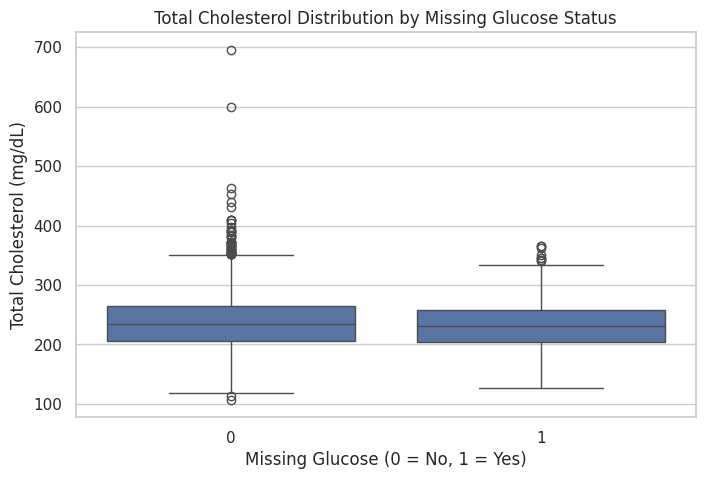

T-test Statistic: -1.3987722241725458
T-test p-value: 0.16261940396447605
Mann-Whitney U Statistic: 641104.0
Mann-Whitney U p-value: 0.20472850722985647


In [12]:
df["missing_glucose"] = df["glucose"].isna().astype(int)

plt.figure(figsize=(8, 5))
sns.boxplot(x="missing_glucose", y="totChol", data=df)
plt.title("Total Cholesterol Distribution by Missing Glucose Status")
plt.xlabel("Missing Glucose (0 = No, 1 = Yes)")
plt.ylabel("Total Cholesterol (mg/dL)")
plt.show()

chol_missing = df[df["glucose"].isna()]["totChol"].dropna()
chol_non_missing = df[df["glucose"].notna()]["totChol"].dropna()
t_stat, t_pvalue = ttest_ind(chol_missing, chol_non_missing, equal_var=False, nan_policy='omit')
u_stat, u_pvalue = mannwhitneyu(chol_missing, chol_non_missing, alternative='two-sided')
print("T-test Statistic:", t_stat)
print("T-test p-value:", t_pvalue)
print("Mann-Whitney U Statistic:", u_stat)
print("Mann-Whitney U p-value:", u_pvalue)

**2. Data Clean**

1.   Missing Values Check and Imputation
2.   Data Preprocessing



In [13]:
# Remove missing glucose column first
df.drop(columns=['missing_glucose'], inplace=True)
df.isnull()
missingValues = df.isnull().sum()
missingValues

,0
gender,0
age,0
education,105
currentSmoker,0
cigsPerDay,29
BPMeds,53
prevalentStroke,0
prevalentHyp,0
diabetes,0
totChol,50


In [14]:
# Impute missing values in 'education' with the mode (most frequent value)
impute_mode = ['education', 'BPMeds']
impute_median = ['cigsPerDay', 'totChol', 'BMI', 'heartRate', 'glucose']

for col in impute_mode:
    df[col].fillna(df[col].mode()[0], inplace=True)

for col in impute_median:
    df[col].fillna(df[col].median(), inplace=True)

df.isnull().sum()

<ipython-input-14-b557608c0666>:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)
<ipython-input-14-b557608c0666>:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using

,0
gender,0
age,0
education,0
currentSmoker,0
cigsPerDay,0
BPMeds,0
prevalentStroke,0
prevalentHyp,0
diabetes,0
totChol,0


In [15]:
# Preprocessing
df.duplicated().sum()
framingham = df.drop_duplicates()
framingham.shape

(4240, 16)

**3. EDA**

<Axes: >

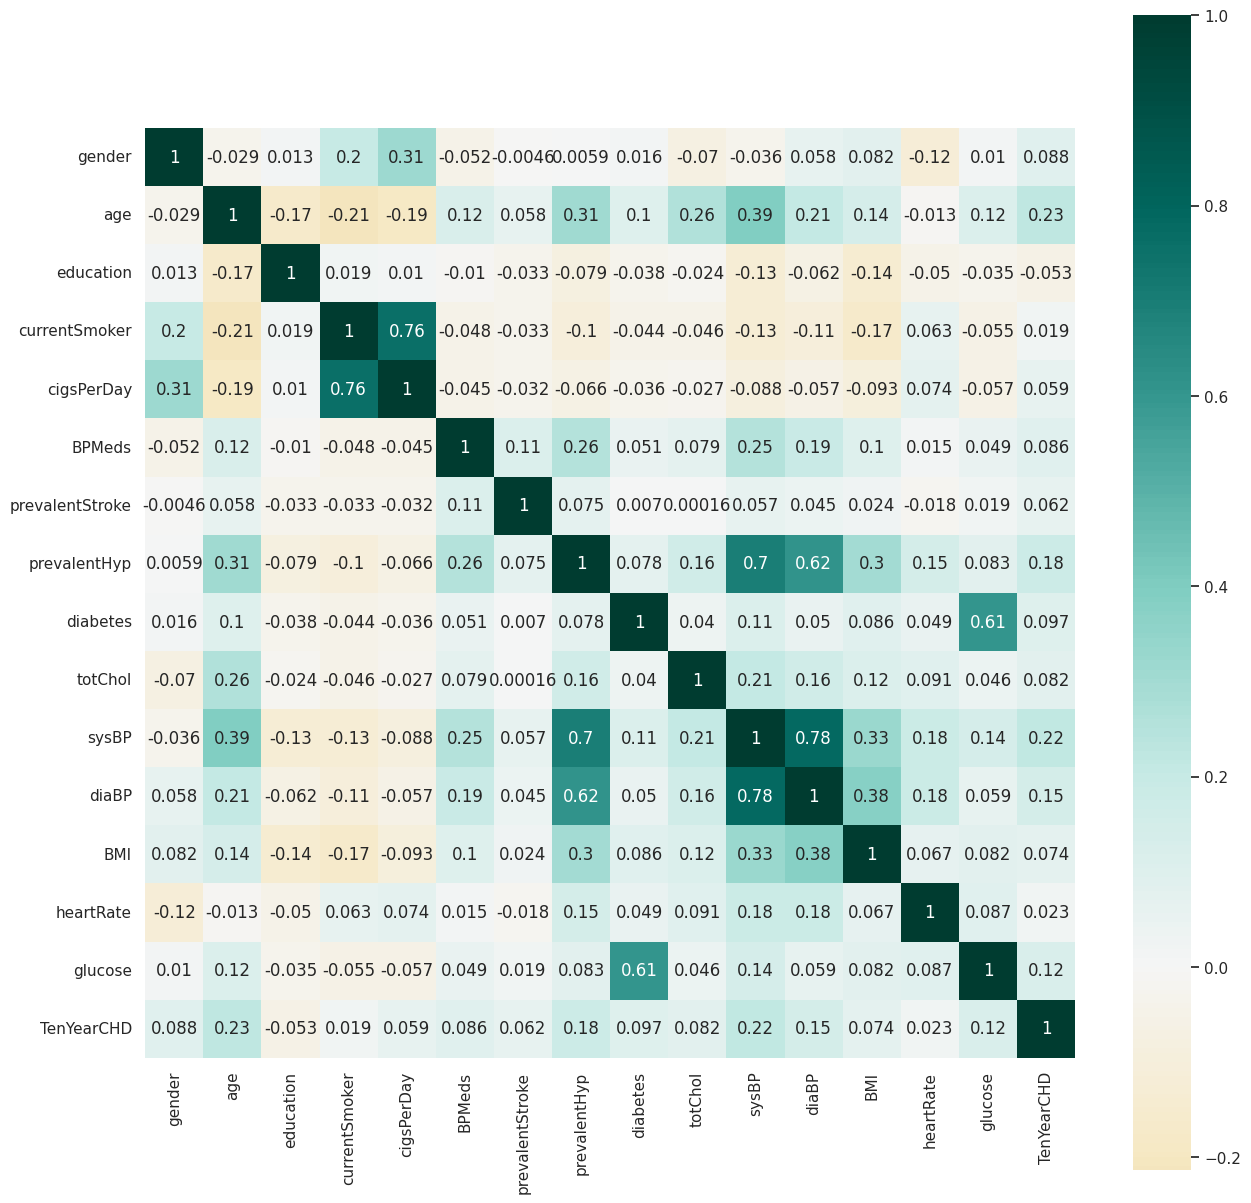

In [16]:
corr_matrix = df.corr()
plt.figure(1, figsize=(15, 15))
sns.heatmap(corr_matrix, cmap='BrBG', center=0, annot=True, square=True)

**Demogrphics and Health Characteristics of the surveyed population**



1.   Categorical variables

  *   Distribution (with the Most Frequent) of Age
  *   Distribution (with proportion) of Gender/Education in FHS

2.   Continuous variabless
  *   Density plots (with skewness) of key cardiovascular risk factors

*   Distribution of heart rate and age groups
*   Systolic blood pressure, Diastolic blood pressures, Glucose and Total Cholesterol vary across different age groups and genders
*   Systolic blood pressure, Diastolic blood pressure, Total Cholesterol, and Ten-Year CHD risk related to each other

Text(40, 50, 'Most Frequent Age: 40')

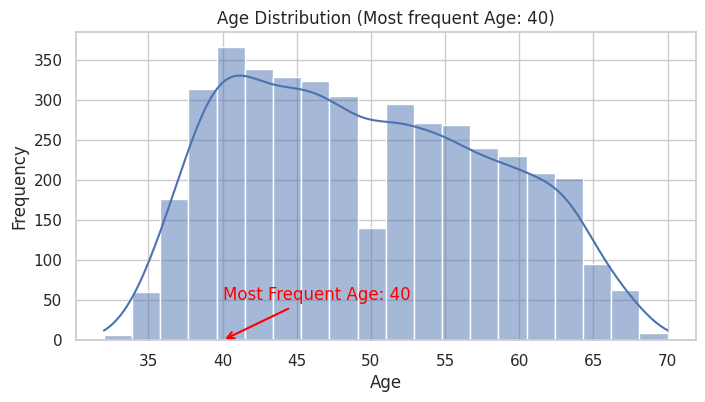

In [17]:
mostFrequentAge = df['age'].mode().values[0]
plt.figure(figsize=(8, 4))
ax = sns.histplot(df['age'], bins=20, kde=True)
ax.set_title(f'Age Distribution (Most frequent Age: {mostFrequentAge})')
ax.set(xlabel='Age', ylabel='Frequency')

plt.annotate(f'Most Frequent Age: {mostFrequentAge}', xy=(mostFrequentAge, 0), xytext=(mostFrequentAge, 50),
             arrowprops=dict(arrowstyle='->', lw=1.5, color='red'), color='red')
# The majority of subjects fall within the age range of 40 to 50, followed by those in the 50 to 70 age range.

<ipython-input-18-3b4305ee7e69>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df, x='gender', palette=colors1)
<ipython-input-18-3b4305ee7e69>:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['Female', 'Male'])


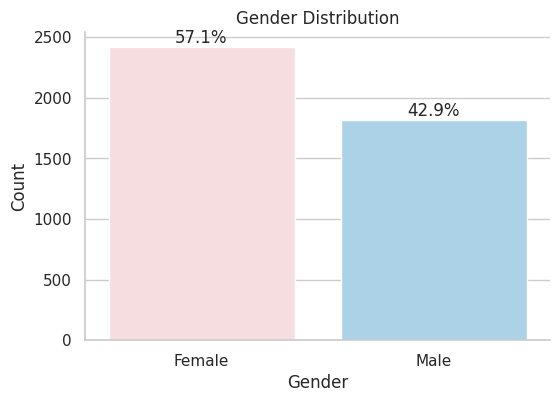

In [18]:
## Plot gender distribution
colors1 = ["#FADADD", "#A2D5F2"]
plt.figure(figsize=(6, 4))
ax = sns.countplot(data=df, x='gender', palette=colors1)
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')

total_count = len(df)
for p in ax.patches:
    percentage = f'{100 * p.get_height() / total_count:.1f}%'
    ax.annotate(percentage, (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom')
ax.set_xticklabels(['Female', 'Male'])
sns.despine()
### slightly majority female, with 57.1% of the population being female and 42.9% of the population being male.

<ipython-input-19-bae89f5f809e>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df, x='education', palette=colors2)
<ipython-input-19-bae89f5f809e>:4: UserWarning: The palette list has more values (6) than needed (4), which may not be intended.
  ax = sns.countplot(data=df, x='education', palette=colors2)
<ipython-input-19-bae89f5f809e>:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['Some High School', 'High School or GED', 'Some College or Vocational School', 'College'])


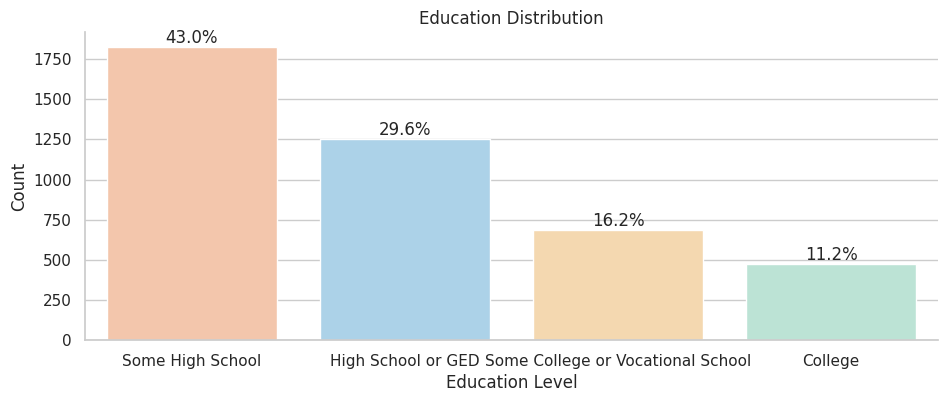

In [19]:
# Plot the disribution of Education
colors2 = ["#FFC3A0", "#A2D5F2", "#FFDAA5", "#B5EAD7", "#C7CEEA", "#FFB7B2"]
plt.figure(figsize=(11,4))
ax = sns.countplot(data=df, x='education', palette=colors2)
plt.title('Education Distribution')
plt.xlabel('Education Level')
plt.ylabel('Count')

total_count = len(df)
for p in ax.patches:
    percentage = f'{100 * p.get_height() / total_count:.1f}%'
    ax.annotate(percentage, (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom')
ax.set_xticklabels(['Some High School', 'High School or GED', 'Some College or Vocational School', 'College'])
sns.despine()

In [20]:
# Define age and heart rate grouping functions using lambda functions and apply groups to create new columns
ageGroups = lambda x: 0 if x <= 40 else (1 if x <= 55 else 2)
heartRateGroups = lambda x: 0 if x <= 60 else (1 if x <= 100 else 2)
df['age_groups'] = df['age'].apply(ageGroups)
df['heart_rate_groups'] = df['heartRate'].apply(heartRateGroups)

plotly_df = df.copy()
plotly_df['heart_rate_groups'] = plotly_df['heart_rate_groups'].map({0: 'Low', 1: 'Normal', 2: 'High'})
plotly_df['age_groups'] = plotly_df['age_groups'].map({0: 'Adults', 1: 'Middle-Aged', 2: 'Senior'})
# Create subplots
fig = make_subplots(rows=1, cols=2, subplot_titles=('HeartRate (Grouped)', 'Count by Age Group'))
# Create the first plot (HeartRate Grouped)
fig.add_trace(go.Bar(x=plotly_df['heart_rate_groups'].value_counts().index, y=plotly_df['heart_rate_groups'].value_counts(), marker_color='#FADADD'), row=1, col=1)
fig.update_xaxes(title_text='Heart Rate Group', row=1, col=1)
fig.update_yaxes(title_text='Count', row=1, col=1)
# Create the second plot (Count by Age Group)
fig.add_trace(go.Bar(x=plotly_df['age_groups'].value_counts().index, y=plotly_df['age_groups'].value_counts(), marker_color='#A2D5F2'), row=1, col=2)
fig.update_xaxes(title_text='Age Group', row=1, col=2)
fig.update_yaxes(title_text='Count', row=1, col=2)

fig.update_layout(height=400, width=1000, showlegend=False)
fig.update_layout(title_text="Heart Rate and Age Group Analysis")
fig.show()
### majority of subjects exhibit a normal heart rate, followed by those with resting or low heart rates,
### and a smaller number with high heart rates.

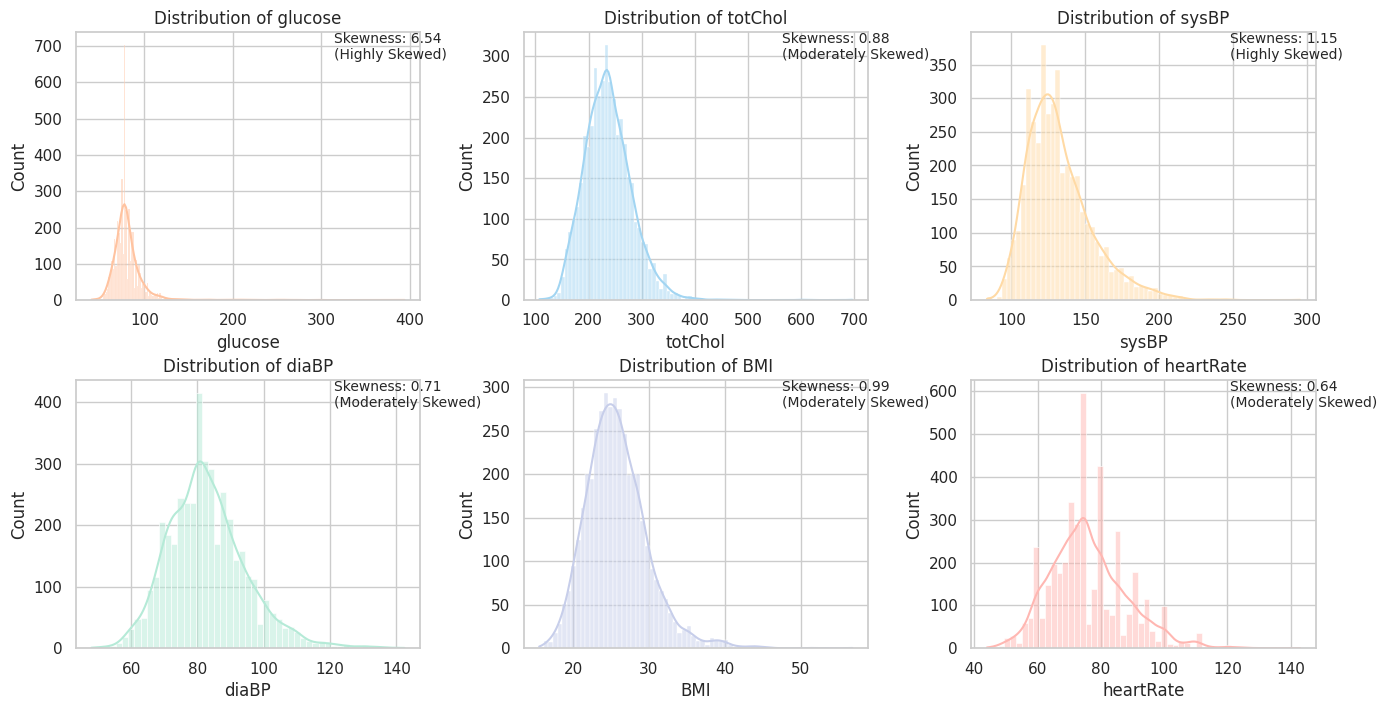

In [18]:
plt.figure(figsize=(16, 8))
plt.subplots_adjust(wspace=0.3, hspace=0.3)
variables = ['glucose', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate']

# Skewness labels based on criteria
def get_skew_label(skewness):
    if skewness < -1 or skewness > 1:
        return 'Highly Skewed'
    elif (-1 <= skewness <= -0.5) or (0.5 <= skewness <= 1):
        return 'Moderately Skewed'
    else:
        return 'Approximately Symmetric'

for i, var in enumerate(variables, 1):
    plt.subplot(2, 3, i)
    sns.histplot(df[var], color=colors2[i - 1], kde=True)  # Plot histogram and KDE
    plt.title(f'Distribution of {var}')

    skewness = df[var].skew()
    skew_label = get_skew_label(skewness)

    plt.text(0.75, 0.9, f'Skewness: {skewness:.2f}\n({skew_label})', transform=plt.gca().transAxes, fontsize=10)

### All Right-skewed

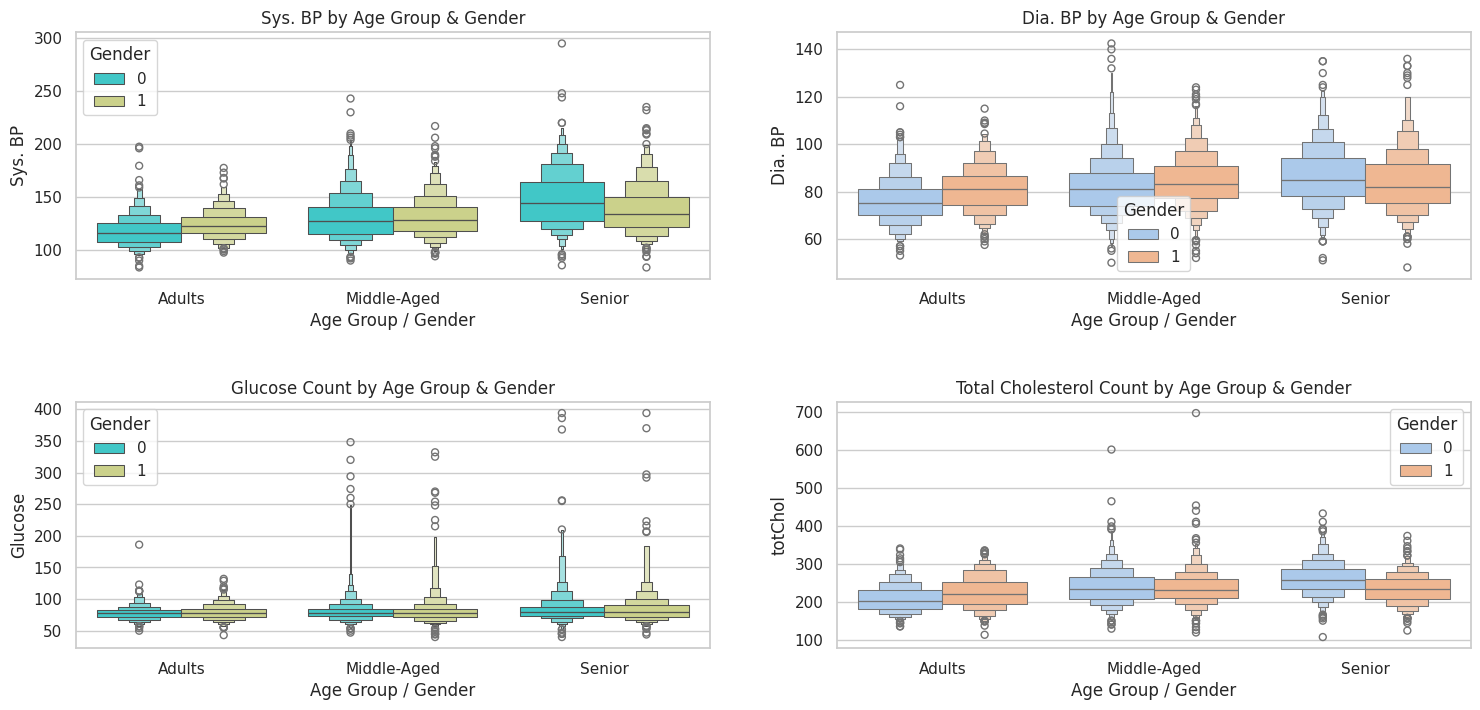

In [19]:
plt.figure(figsize=(18, 8))
plt.subplots_adjust(wspace=0.2, hspace=0.5)
ageGroupLabels = ['Adults', 'Middle-Aged', 'Senior']
# Create the boxenplots for Sys. BP
plt.subplot(2, 2, 1)
sns.boxenplot(x='age_groups', y='sysBP', hue='gender', data=df, palette='rainbow')
plt.xlabel('Age Group / Gender')
plt.ylabel('Sys. BP')
plt.xticks(ticks=[0, 1, 2], labels=ageGroupLabels)
plt.title('Sys. BP by Age Group & Gender')
plt.legend(title='Gender')
# Create the boxenplot for Dia. BP
plt.subplot(2, 2, 2)
sns.boxenplot(x='age_groups', y='diaBP', hue='gender', data=df, palette='pastel')
plt.xlabel('Age Group / Gender')
plt.ylabel('Dia. BP')
plt.xticks(ticks=[0, 1, 2], labels=ageGroupLabels)
plt.title('Dia. BP by Age Group & Gender')
plt.legend(title='Gender')
# Create the boxenplot for glucose
plt.subplot(2, 2, 3)
sns.boxenplot(x='age_groups', y='glucose', hue='gender', data=df, palette='rainbow')
plt.xlabel('Age Group / Gender')
plt.ylabel('Glucose')
plt.xticks(ticks=[0, 1, 2], labels=ageGroupLabels)
plt.title('Glucose Count by Age Group & Gender')
plt.legend(title='Gender')
# Create the boxenplot for totChol
plt.subplot(2, 2, 4)
sns.boxenplot(x='age_groups', y='totChol', hue='gender', data=df, palette='pastel')
plt.xlabel('Age Group / Gender')
plt.ylabel('totChol')
plt.xticks(ticks=[0, 1, 2], labels=ageGroupLabels)
plt.title('Total Cholesterol Count by Age Group & Gender')
plt.legend(title='Gender')
### both SBP and DBP tend to increase with age.
### the rate of increase is different for SBP and DBP. SBP tends to increase more rapidly than DBP, especially after the age of 50.
### glucose also increase with age. Gender wise Glucose Count has almost similiar Median with Few outliers in each.
### by excluding outliers there is a general trend of increasing total cholesterol levels with age for females, for Males the Cholesterol level Quantile is Approx. e group.

Text(0.5, 1.0, 'Pairplot of sysBP, diaBP, totChol vs. TenYearCHD')

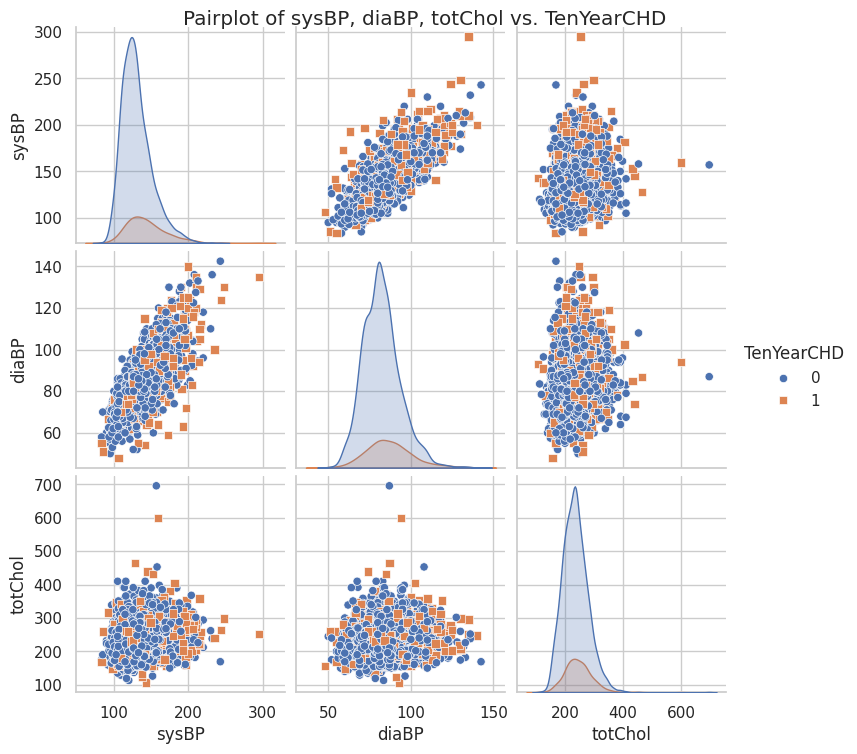

In [21]:
### sysBP, diaBP, totChol, and TenYearCHD are all risk factors for coronary heart disease.
sns.pairplot(data=df, vars=['sysBP', 'diaBP', 'totChol'], hue='TenYearCHD', markers=["o", "s"])
plt.suptitle('Pairplot of sysBP, diaBP, totChol vs. TenYearCHD', y=1.00)



*   There is a positive correlation between sysBP and TenYearCHD, meaning that people with higher systolic blood pressure have a higher risk of developing coronary heart disease within 10 years.
*   There is a positive correlation between diaBP and TenYearCHD, meaning that people with higher diastolic blood pressure also have a higher risk of developing coronary heart disease within 10 years.
*   There is a positive correlation between totChol and TenYearCHD, meaning that people with higher total cholesterol levels also have a higher risk of developing coronary heart disease within 10 years.
*   There is a positive correlation between sysBP and diaBP, meaning that people with higher systolic blood pressure tend to also have higher diastolic blood pressure.
*   There is a positive correlation between sysBP and totChol, meaning that people with higher systolic blood pressure tend to also have higher total cholesterol levels.
*   There is a positive correlation between diaBP and totChol, meaning that people with higher diastolic blood pressure tend to also have higher total cholesterol levels.



In [105]:
import matplotlib.pyplot as plt
from statsmodels.stats.outliers_influence import variance_inflation_factor
from imblearn.over_sampling import SMOTE
from sklearn.utils import resample
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.inspection import permutation_importance
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

from collections import Counter
import statsmodels.api as sm

**4. Logistic Regression Feature Estimation**

In [23]:
df.drop(columns=['age_groups', 'heart_rate_groups'], inplace=True)
df = df.apply(pd.to_numeric, errors='coerce')
df.dtypes
df["TenYearCHD"] = df["TenYearCHD"].astype(int)

In [24]:
# Modeling Target Variable: TenYearCHD
df_encoded = pd.get_dummies(df, columns=categorical_columns, drop_first=True).astype(int)
df_encoded.head()

,age,cigsPerDay,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD,gender_1,education_2.0,education_3.0,education_4.0,currentSmoker_1,BPMeds_1.0,prevalentStroke_1,prevalentHyp_1,diabetes_1
0,39,0,195,106,70,26,80,77,0,1,0,0,1,0,0,0,0,0
1,46,0,250,121,81,28,95,76,0,0,1,0,0,0,0,0,0,0
2,48,20,245,127,80,25,75,70,0,1,0,0,0,1,0,0,0,0
3,61,30,225,150,95,28,65,103,1,0,0,1,0,1,0,0,1,0
4,46,23,285,130,84,23,85,85,0,0,0,1,0,1,0,0,0,0


In [25]:
x = df_encoded.drop(columns=['TenYearCHD'])
y = df_encoded['TenYearCHD']
X = sm.add_constant(x)
## Multicollinearity Assessment
vif_data = pd.DataFrame()
vif_data["Variable"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif_data

,Variable,VIF
0,const,193.469478
1,age,1.410420
2,cigsPerDay,2.574145
3,totChol,1.107649
4,sysBP,3.737634
5,diaBP,2.964473
6,BMI,1.240432
7,heartRate,1.097358
8,glucose,1.612033
9,gender_1,1.212388


In [26]:
# Conduct Logistic Regression Model
logModel = sm.Logit(y,X).fit()
logModel.summary()

Optimization terminated successfully.
         Current function value: 0.378063
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             TenYearCHD   No. Observations:                 4240
Model:                          Logit   Df Residuals:                     4222
Method:                           MLE   Df Model:                           17
Date:                Fri, 21 Feb 2025   Pseudo R-squ.:                  0.1125
Time:                        20:48:45   Log-Likelihood:                -1603.0
converged:                       True   LL-Null:                       -1806.1
Covariance Type:            nonrobust   LLR p-value:                 9.196e-76
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -8.0355      0.657    -12.237      0.000      -9.323      -6.748
age                   0.0608      0.006      9.670      0.000       0.048       0.073
cigsPerDay            0.0215      0.006      3.810      0.000       0.010       0.033
totChol               0.0019      0.001      1.830      0.067      -0.000       0.004
sysBP                 0.0141      0.004      3.970      0.000       0.007       0.021
diaBP                -0.0027      0.006     -0.458      0.647      -0.014       0.009
BMI                   0.0028      0.012      0.241      0.809      -0.020       0.026
heartRate            -0.0012      0.004     -0.316      0.752      -0.009       0.006
glucose               0.0068      0.002      3.170      0.002       0.003       0.011
gender_1              0.4807      0.101      4.747      0.000       0.282       0.679
education_2.0        -0.1909      0.115     -1.657      0.097      -0.417       0.035
education_3.0        -0.0929      0.139     -0.669      0.504      -0.365       0.179
education_4.0         0.0326      0.153      0.214      0.831      -0.266       0.332
currentSmoker_1       0.0189      0.143      0.132      0.895      -0.261       0.299
BPMeds_1.0            0.2481      0.220      1.125      0.261      -0.184       0.680
prevalentStroke_1     0.9688      0.444      2.182      0.029       0.098       1.839
prevalentHyp_1        0.2299      0.129      1.787      0.074      -0.022       0.482
diabetes_1            0.1733      0.295      0.587      0.557      -0.405       0.752
=====================================================================================
"""

**5. Machine Learning**

    Data Clean and Processing for Modeling

1.   Logistic Regression Model
2.   KNeighbour Classifier
3.   DecisionTree Classifier
4.   RandomForest Classifier



<ipython-input-31-725457c0a045>:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




,count
TenYearCHD,
0,3596
1,644


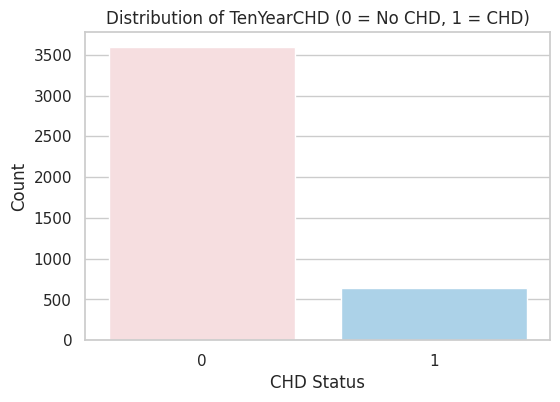

In [31]:
## Imbalance entire Outcome: TenYearCHD
chdCount = y.value_counts()
plt.figure(figsize=(6,4))
sns.barplot(x=chdCount.index, y=chdCount.values, palette=colors1)
plt.title("Distribution of TenYearCHD")
plt.xlabel("CHD Status (0 = No CHD, 1 = CHD)")
plt.ylabel("Count")
plt.xticks(rotation = 0)
chdCount
## The dataset of outcome is seriously imbalanced, apply Oversampling

In [63]:
## Split the dataset into training and testing
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42)

Apply **Oversampling** to balance the dataset

<ipython-input-64-123dba734e12>:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




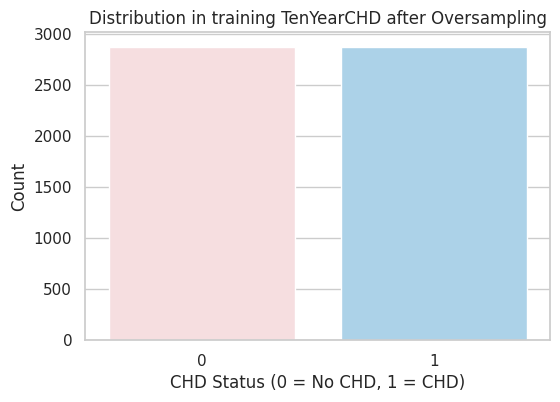

In [64]:
## Apply SMOTE only to training data
smote = SMOTE(random_state=42)
x_train_resampled, y_train_resampled = smote.fit_resample(x_train, y_train)

plt.figure(figsize=(6,4))
sns.barplot(x=y_train_resampled.value_counts().index, y=y_train_resampled.value_counts().values, palette=colors1)
plt.title("Distribution in training TenYearCHD after Oversampling")
plt.xlabel("CHD Status (0 = No CHD, 1 = CHD)")
plt.ylabel("Count")
plt.show()
### Ensure the model is trained on a balanced dataset.

In [65]:
## RFE with RandomForest
rfe = RFE(estimator=RandomForestClassifier(), n_features_to_select=7)
rfeModel = rfe.fit(x_train_resampled, y_train_resampled)
rfeModel
rfeModel.ranking_
rfeModel.feature_names_in_

array(['age', 'cigsPerDay', 'totChol', 'sysBP', 'diaBP', 'BMI',
       'heartRate', 'glucose', 'gender_1', 'education_2.0',
       'education_3.0', 'education_4.0', 'currentSmoker_1', 'BPMeds_1.0',
       'prevalentStroke_1', 'prevalentHyp_1', 'diabetes_1'], dtype=object)

In [66]:
## Feature Ranking in a DataFrame
rank = pd.DataFrame({'Features': rfeModel.feature_names_in_,'Ranking': rfeModel.ranking_})
rank[rank['Ranking'] == 1]['Features'].values

array(['age', 'cigsPerDay', 'totChol', 'sysBP', 'diaBP', 'heartRate',
       'glucose'], dtype=object)

In [67]:
features=[]
for i in rank[rank['Ranking']==1]['Features'].values:
    features.append(i)
features

['age', 'cigsPerDay', 'totChol', 'sysBP', 'diaBP', 'heartRate', 'glucose']

In [68]:
x_train_rfe = x_train_resampled[features]
x_test_rfe = x_test[features]

***5.1 LogisticRegressionClassifier()***

In [110]:
# Baseline Model
## Initialize Logistic Regression Classifier
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train_rfe)
x_test_scaled = scaler.transform(x_test_rfe)
x_train_scaled = pd.DataFrame(x_train_scaled, columns=x_train_rfe.columns)
x_test_scaled = pd.DataFrame(x_test_scaled, columns=x_test_rfe.columns)
logisticModel = LogisticRegression(max_iter = 1000, class_weight="balanced", random_state=42)
logisticModel.fit(x_train_scaled, y_train_resampled)

y_pred_train = logisticModel.predict(x_train_scaled)
y_pred_test = logisticModel.predict(x_test_scaled)

print("The train accuracy score is: ",accuracy_score(y_train_resampled,y_pred_train))
print("The test accuracy score is: ",accuracy_score(y_test,y_pred_test))
print("-"*50)
print("The train precision score is: ",precision_score(y_train_resampled,y_pred_train))
print("The test precision score is: ",accuracy_score(y_test,y_pred_test))
print("-"*50)
print("The train recall score is: ",recall_score(y_train_resampled,y_pred_train))
print("The test recall score is: ",recall_score(y_test,y_pred_test))
print("-"*50)
print("The train f1-score score is: ",f1_score(y_train_resampled,y_pred_train))
print("The test f1-score score is: ",f1_score(y_test,y_pred_test))

The train accuracy score is:  0.667189132706374
The test accuracy score is:  0.6415094339622641
--------------------------------------------------
The train precision score is:  0.6622718052738337
The test precision score is:  0.6415094339622641
--------------------------------------------------
The train recall score is:  0.6823406478578893
The test recall score is:  0.6016260162601627
--------------------------------------------------
The train f1-score score is:  0.6721564590838909
The test f1-score score is:  0.3274336283185841


In [111]:
# Optimization
## Apply L1 Regularization (LASSO) to Remove Correlated Features
lassoModel = LogisticRegression(penalty='l1', solver='liblinear', max_iter=1000, class_weight="balanced", random_state=42)
lassoModel.fit(x_train_resampled, y_train_resampled)

lassoFeatures = x_train_resampled.columns[lassoModel.coef_[0] != 0]
lassoFeatures = lassoFeatures[:7] # Select top 7 features as RFE
lassoFeatures
# Index(['age', 'cigsPerDay', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', dtype='object')
# Compared the features selected by RFE vs. LASSO, add 'BMI' and remove 'glucose'

Index(['age', 'cigsPerDay', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate'], dtype='object')

In [112]:
x_train_lasso = x_train_resampled[lassoFeatures]
x_test_lasso = x_test[lassoFeatures]

lassoModel.fit(x_train_lasso, y_train_resampled)
y_pred_lasso_train = lassoModel.predict(x_train_lasso)
y_pred_lasso_test = lassoModel.predict(x_test_lasso)

print("The train accuracy score is: ",accuracy_score(y_train_resampled,y_pred_lasso_train))
print("The test accuracy score is: ",accuracy_score(y_test,y_pred_lasso_test))
print("-"*50)
print("The train precision score is: ",precision_score(y_train_resampled,y_pred_lasso_train))
print("The test precision score is: ",accuracy_score(y_test,y_pred_lasso_test))
print("-"*50)
print("The train recall score is: ",recall_score(y_train_resampled,y_pred_lasso_train))
print("The test recall score is: ",recall_score(y_test,y_pred_lasso_test))
print("-"*50)
print("The train f1-score score is: ",f1_score(y_train_resampled,y_pred_lasso_train))
print("The test f1-score score is: ",f1_score(y_test,y_pred_lasso_test))
# Worse performance, give it up

The train accuracy score is:  0.6609195402298851
The test accuracy score is:  0.6367924528301887
--------------------------------------------------
The train precision score is:  0.6568228105906314
The test precision score is:  0.6367924528301887
--------------------------------------------------
The train recall score is:  0.6739811912225705
The test recall score is:  0.6097560975609756
--------------------------------------------------
The train f1-score score is:  0.6652913873130479
The test f1-score score is:  0.32751091703056767


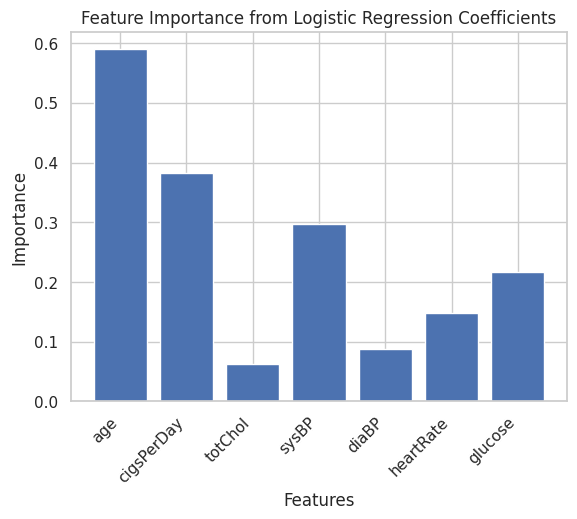

In [114]:
# Compute permutation importance
logistic_perm_importance = permutation_importance(logisticModel, x_test_scaled, y_test, n_repeats=10, random_state=42)

logistic_feature_importance = pd.DataFrame({
    "Feature": x_train_scaled.columns,
    "Importance": logistic_perm_importance.importances_mean
}).sort_values(by="Importance", ascending=False)
logistic_feature_importance

# Access the coefficients of the fitted logistic regression model
logistic_importance = np.abs(logisticModel.coef_[0])

# Plot feature importance based on coefficients
plt.bar(x_train_scaled.columns, logistic_importance)
plt.title("Feature Importance from Logistic Regression Coefficients")
plt.xlabel("Features")
plt.ylabel("Importance")
plt.xticks(rotation=45, ha='right')
plt.show()

***4.2 KNeighboursClassifier()***

In [125]:
# Baseline Model
## Initialize KNN Classifier
knn = KNeighborsClassifier() # Default: n_neighbour = 5, metric = 'minkowski'
knnModel = knn.fit(x_train_scaled, y_train_resampled)
knnModel
y_pred_train = knnModel.predict(x_train_scaled)
y_pred_test = knnModel.predict(x_test_scaled)

print("The train accuracy score is: ",accuracy_score(y_train_resampled,y_pred_train))
print("The test accuracy score is: ",accuracy_score(y_test,y_pred_test))
print("-"*50)
print("The train precision score is: ",precision_score(y_train_resampled,y_pred_train))
print("The test precision score is: ",accuracy_score(y_test,y_pred_test))
print("-"*50)
print("The train recall score is: ",recall_score(y_train_resampled,y_pred_train))
print("The test recall score is: ",recall_score(y_test,y_pred_test))
print("-"*50)
print("The train f1-score score is: ",f1_score(y_train_resampled,y_pred_train))
print("The test f1-score score is: ",f1_score(y_test,y_pred_test))
print("-"*50)

The train accuracy score is:  0.8739115290839429
The test accuracy score is:  0.6426886792452831
--------------------------------------------------
The train precision score is:  0.8071530758226038
The test precision score is:  0.6426886792452831
--------------------------------------------------
The train recall score is:  0.9825844653430861
The test recall score is:  0.4959349593495935
--------------------------------------------------
The train f1-score score is:  0.8862708136977694
The test f1-score score is:  0.28705882352941176
--------------------------------------------------


    Optimzed Model: Apply Euclidean distance to the same scaled data to get the accompanying plot for further Classifiers.

In [126]:
params=[{'n_neighbors': [3, 5, 7, 9], 'metric': ['euclidean', 'manhattan', 'minkowski']}]
grd=GridSearchCV(estimator = knn,param_grid=params,cv = 3)
grd_model=grd.fit(x_train_scaled,y_train_resampled)
grd_model.best_params_

{'metric': 'manhattan', 'n_neighbors': 3}

In [136]:
knn1 = KNeighborsClassifier(metric = 'euclidean', n_neighbors = 5)
knn1Model = knn1.fit(x_train_scaled, y_train_resampled)
y_pred_train = knn1Model.predict(x_train_scaled)
y_pred_test = knn1Model.predict(x_test_scaled)

print("The train accuracy score is: ",accuracy_score(y_train_resampled,y_pred_train))
print("The test accuracy score is: ",accuracy_score(y_test,y_pred_test))
print("-"*50)
print("The train precision score is: ",precision_score(y_train_resampled,y_pred_train))
print("The test precision score is: ",accuracy_score(y_test,y_pred_test))
print("-"*50)
print("The train recall score is: ",recall_score(y_train_resampled,y_pred_train))
print("The test recall score is: ",recall_score(y_test,y_pred_test))
print("-"*50)
print("The train f1-score score is: ",f1_score(y_train_resampled,y_pred_train))
print("The test f1-score score is: ",f1_score(y_test,y_pred_test))

The train accuracy score is:  0.8739115290839429
The test accuracy score is:  0.6426886792452831
--------------------------------------------------
The train precision score is:  0.8071530758226038
The test precision score is:  0.6426886792452831
--------------------------------------------------
The train recall score is:  0.9825844653430861
The test recall score is:  0.4959349593495935
--------------------------------------------------
The train f1-score score is:  0.8862708136977694
The test f1-score score is:  0.28705882352941176


In [139]:
knn2 = KNeighborsClassifier(metric = 'manhattan', n_neighbors = 3)
knn2Model = knn2.fit(x_train_scaled, y_train_resampled)
y_pred_train = knn2Model.predict(x_train_scaled)
y_pred_test = knn2Model.predict(x_test_scaled)

print("The train accuracy score is: ",accuracy_score(y_train_resampled,y_pred_train))
print("The test accuracy score is: ",accuracy_score(y_test,y_pred_test))
print("-"*50)
print("The train precision score is: ",precision_score(y_train_resampled,y_pred_train))
print("The test precision score is: ",accuracy_score(y_test,y_pred_test))
print("-"*50)
print("The train recall score is: ",recall_score(y_train_resampled,y_pred_train))
print("The test recall score is: ",recall_score(y_test,y_pred_test))
print("-"*50)
print("The train f1-score score is: ",f1_score(y_train_resampled,y_pred_train))
print("The test f1-score score is: ",f1_score(y_test,y_pred_test))

The train accuracy score is:  0.9148380355276907
The test accuracy score is:  0.6851415094339622
--------------------------------------------------
The train precision score is:  0.859167671893848
The test precision score is:  0.6851415094339622
--------------------------------------------------
The train recall score is:  0.9923371647509579
The test recall score is:  0.43902439024390244
--------------------------------------------------
The train f1-score score is:  0.9209633101664781
The test f1-score score is:  0.288


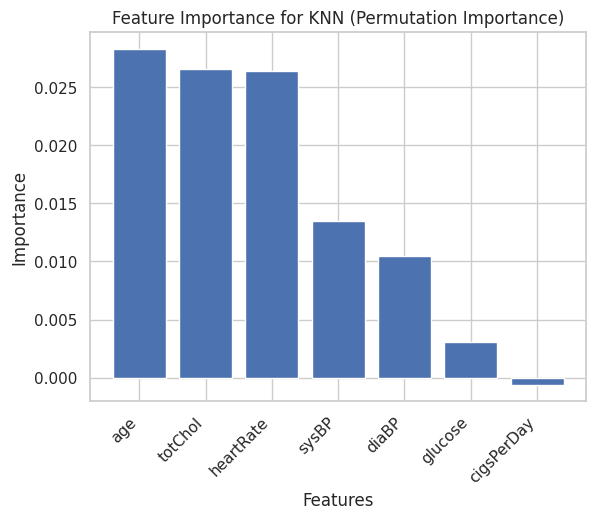

In [140]:
knn_perm_importance = permutation_importance(knn2Model, x_test_scaled, y_test, n_repeats=10, random_state=42)

# Create a DataFrame to store feature importance
knn_feature_importance = pd.DataFrame({
    "Feature": x_train_scaled.columns,
    "Importance": knn_perm_importance.importances_mean
}).sort_values(by="Importance", ascending=False)

# Plot feature importance
plt.bar(knn_feature_importance["Feature"], knn_feature_importance["Importance"])
plt.title("Feature Importance for KNN (Permutation Importance)")
plt.xlabel("Features")
plt.ylabel("Importance")
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()

***4.3 DecisionTreeClassifier()***

In [82]:
dt = DecisionTreeClassifier()
dtModel = dt.fit(x_train_rfe, y_train_resampled)
dtModel

y_pred_train = dtModel.predict(x_train_rfe)
y_pred_test = dtModel.predict(x_test_rfe)

print("The train accuracy score is: ",accuracy_score(y_train_resampled,y_pred_train))
print("The test accuracy score is: ",accuracy_score(y_test,y_pred_test))
print("-"*50)
print("The train precision score is: ",precision_score(y_train_resampled,y_pred_train))
print("The test precision score is: ",accuracy_score(y_test,y_pred_test))
print("-"*50)
print("The train recall score is: ",recall_score(y_train_resampled,y_pred_train))
print("The test recall score is: ",recall_score(y_test,y_pred_test))
print("-"*50)
print("The train f1-score score is: ",f1_score(y_train_resampled,y_pred_train))
print("The test f1-score score is: ",f1_score(y_test,y_pred_test))
# Overfitting!

The train accuracy score is:  1.0
The test accuracy score is:  0.6981132075471698
--------------------------------------------------
The train precision score is:  1.0
The test precision score is:  0.6981132075471698
--------------------------------------------------
The train recall score is:  1.0
The test recall score is:  0.3089430894308943
--------------------------------------------------
The train f1-score score is:  1.0
The test f1-score score is:  0.2289156626506024


In [83]:
params=[{'criterion':['gini','entropy'],'max_depth':range(4,11),'min_samples_split':range(2,10)}]
grd=GridSearchCV(estimator=dt,param_grid=params,cv=3)
grd_model=grd.fit(x_train_rfe,y_train_resampled)
grd_model.best_params_  # {'criterion': 'gini', 'max_depth': 10, 'min_samples_split': 2}

{'criterion': 'gini', 'max_depth': 10, 'min_samples_split': 2}

In [84]:
dt=DecisionTreeClassifier(criterion='gini',max_depth=10,min_samples_split=2)
dtModel=dt.fit(x_train_rfe,y_train_resampled)
y_pred_train=dtModel.predict(x_train_rfe)
y_pred_test=dtModel.predict(x_test_rfe)

print("The train accuracy score is: ",accuracy_score(y_train_resampled,y_pred_train))
print("The test accuracy score is: ",accuracy_score(y_test,y_pred_test))
print("-"*50)
print("The train precision score is: ",precision_score(y_train_resampled,y_pred_train))
print("The test precision score is: ",accuracy_score(y_test,y_pred_test))
print("-"*50)
print("The train recall score is: ",recall_score(y_train_resampled,y_pred_train))
print("The test recall score is: ",recall_score(y_test,y_pred_test))
print("-"*50)
print("The train f1-score score is: ",f1_score(y_train_resampled,y_pred_train))
print("The test f1-score score is: ",f1_score(y_test,y_pred_test))

The train accuracy score is:  0.8300243817485197
The test accuracy score is:  0.6108490566037735
--------------------------------------------------
The train precision score is:  0.7814077814077814
The test precision score is:  0.6108490566037735
--------------------------------------------------
The train recall score is:  0.9164054336468129
The test recall score is:  0.4796747967479675
--------------------------------------------------
The train f1-score score is:  0.8435395960243668
The test f1-score score is:  0.26339285714285715


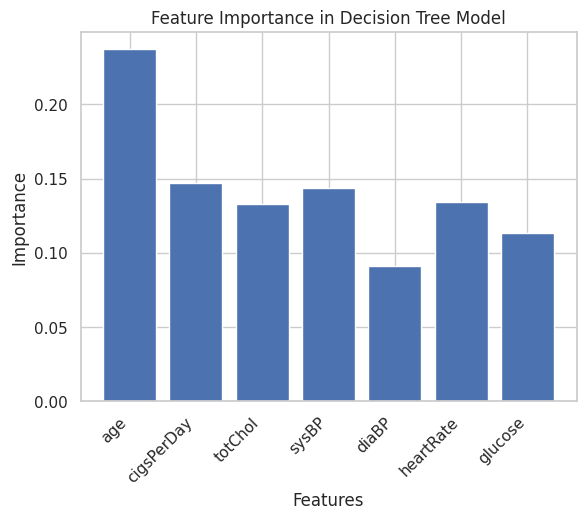

In [85]:
plt.bar(x_train_rfe.columns, dtModel.feature_importances_)
plt.title("Feature Importance in Decision Tree Model")
plt.xlabel("Features")
plt.ylabel("Importance")
plt.xticks(rotation=45, ha='right')
plt.show()

***4.4 RandomForestClassifier()***

In [86]:
rf = RandomForestClassifier()
rfModel = rf.fit(x_train_rfe, y_train_resampled)
rfModel
y_pred_train=rfModel.predict(x_train_rfe)
y_pred_test=rfModel.predict(x_test_rfe)

print("The train accuracy score is: ",accuracy_score(y_train_resampled,y_pred_train))
print("The test accuracy score is: ",accuracy_score(y_test,y_pred_test))
print("-"*50)
print("The train precision score is: ",precision_score(y_train_resampled,y_pred_train))
print("The test precision score is: ",accuracy_score(y_test,y_pred_test))
print("-"*50)
print("The train recall score is: ",recall_score(y_train_resampled,y_pred_train))
print("The test recall score is: ",recall_score(y_test,y_pred_test))
print("-"*50)
print("The train f1-score score is: ",f1_score(y_train_resampled,y_pred_train))
print("The test f1-score score is: ",f1_score(y_test,y_pred_test))
# Overfitting

The train accuracy score is:  1.0
The test accuracy score is:  0.777122641509434
--------------------------------------------------
The train precision score is:  1.0
The test precision score is:  0.777122641509434
--------------------------------------------------
The train recall score is:  1.0
The test recall score is:  0.23577235772357724
--------------------------------------------------
The train f1-score score is:  1.0
The test f1-score score is:  0.23481781376518218


In [87]:
params = [{'n_estimators': [100,150,200], 'max_depth':range(2,4),'max_features':["sqrt", "log2", None]}]
grd = GridSearchCV(estimator=rf, param_grid=params, cv=3)
grd_model = grd.fit(x_train_rfe, y_train_resampled)
print(grd_model.best_params_) # {'max_depth': 3, 'max_features': 'sqrt', 'n_estimators': 100}

{'max_depth': 3, 'max_features': 'sqrt', 'n_estimators': 100}


In [89]:
# {'max_depth': 3, 'max_features': 'sqrt', 'n_estimators': 100}
rf1 = RandomForestClassifier(max_depth=3, max_features='sqrt', n_estimators=100, random_state=42)
rf1Model = rf1.fit(x_train_rfe, y_train_resampled)
y_pred_train = rf1Model.predict(x_train_rfe)
y_pred_test = rf1Model.predict(x_test_rfe)

print("The train accuracy score is: ",accuracy_score(y_train_resampled,y_pred_train))
print("The test accuracy score is: ",accuracy_score(y_test,y_pred_test))
print("-"*50)
print("The train precision score is: ",precision_score(y_train_resampled,y_pred_train))
print("The test precision score is: ",accuracy_score(y_test,y_pred_test))
print("-"*50)
print("The train recall score is: ",recall_score(y_train_resampled,y_pred_train))
print("The test recall score is: ",recall_score(y_test,y_pred_test))
print("-"*50)
print("The train f1-score score is: ",f1_score(y_train_resampled,y_pred_train))
print("The test f1-score score is: ",f1_score(y_test,y_pred_test))

The train accuracy score is:  0.6849529780564263
The test accuracy score is:  0.6226415094339622
--------------------------------------------------
The train precision score is:  0.6714009038089089
The test precision score is:  0.6226415094339622
--------------------------------------------------
The train recall score is:  0.724486241727621
The test recall score is:  0.5853658536585366
--------------------------------------------------
The train f1-score score is:  0.6969341598257665
The test f1-score score is:  0.3103448275862069


In [90]:
# {'max_depth': 2, 'max_features': 'sqrt', 'n_estimators': 100}
rf2 = RandomForestClassifier(max_depth=2, max_features='sqrt', n_estimators=100, random_state=42)
rf2Model = rf2.fit(x_train_rfe, y_train_resampled)
y_pred_train = rf2Model.predict(x_train_rfe)
y_pred_test = rf2Model.predict(x_test_rfe)

print("The train accuracy score is: ",accuracy_score(y_train_resampled,y_pred_train))
print("The test accuracy score is: ",accuracy_score(y_test,y_pred_test))
print("-"*50)
print("The train precision score is: ",precision_score(y_train_resampled,y_pred_train))
print("The test precision score is: ",accuracy_score(y_test,y_pred_test))
print("-"*50)
print("The train recall score is: ",recall_score(y_train_resampled,y_pred_train))
print("The test recall score is: ",recall_score(y_test,y_pred_test))
print("-"*50)
print("The train f1-score score is: ",f1_score(y_train_resampled,y_pred_train))
print("The test f1-score score is: ",f1_score(y_test,y_pred_test))

The train accuracy score is:  0.6628352490421456
The test accuracy score is:  0.6474056603773585
--------------------------------------------------
The train precision score is:  0.6618206992038768
The test precision score is:  0.6474056603773585
--------------------------------------------------
The train recall score is:  0.66597004528039
The test recall score is:  0.5853658536585366
--------------------------------------------------
The train f1-score score is:  0.6638888888888889
The test f1-score score is:  0.32505643340857787


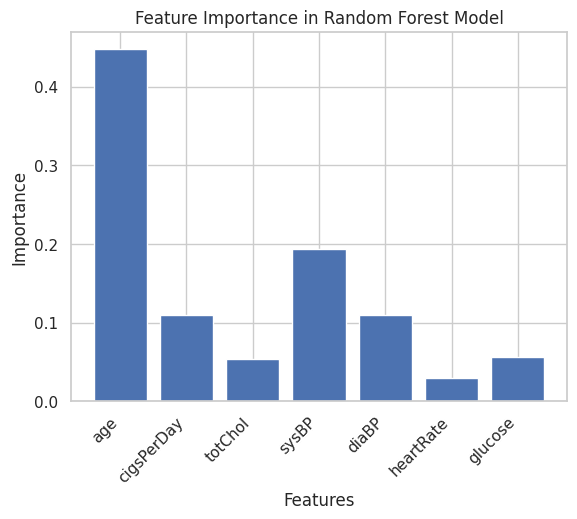

In [91]:
plt.bar(x_train_rfe.columns, rf1Model.feature_importances_)
plt.title("Feature Importance in Random Forest Model")
plt.xlabel("Features")
plt.ylabel("Importance")
plt.xticks(rotation=45, ha='right')
plt.show()